<a href="https://colab.research.google.com/github/sjkim-audio/audio-dsp-lab/blob/main/notebooks/05_Audio_Manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Length: 14.84 s
Stretched Length: 9.89 s (Speed x1.5)


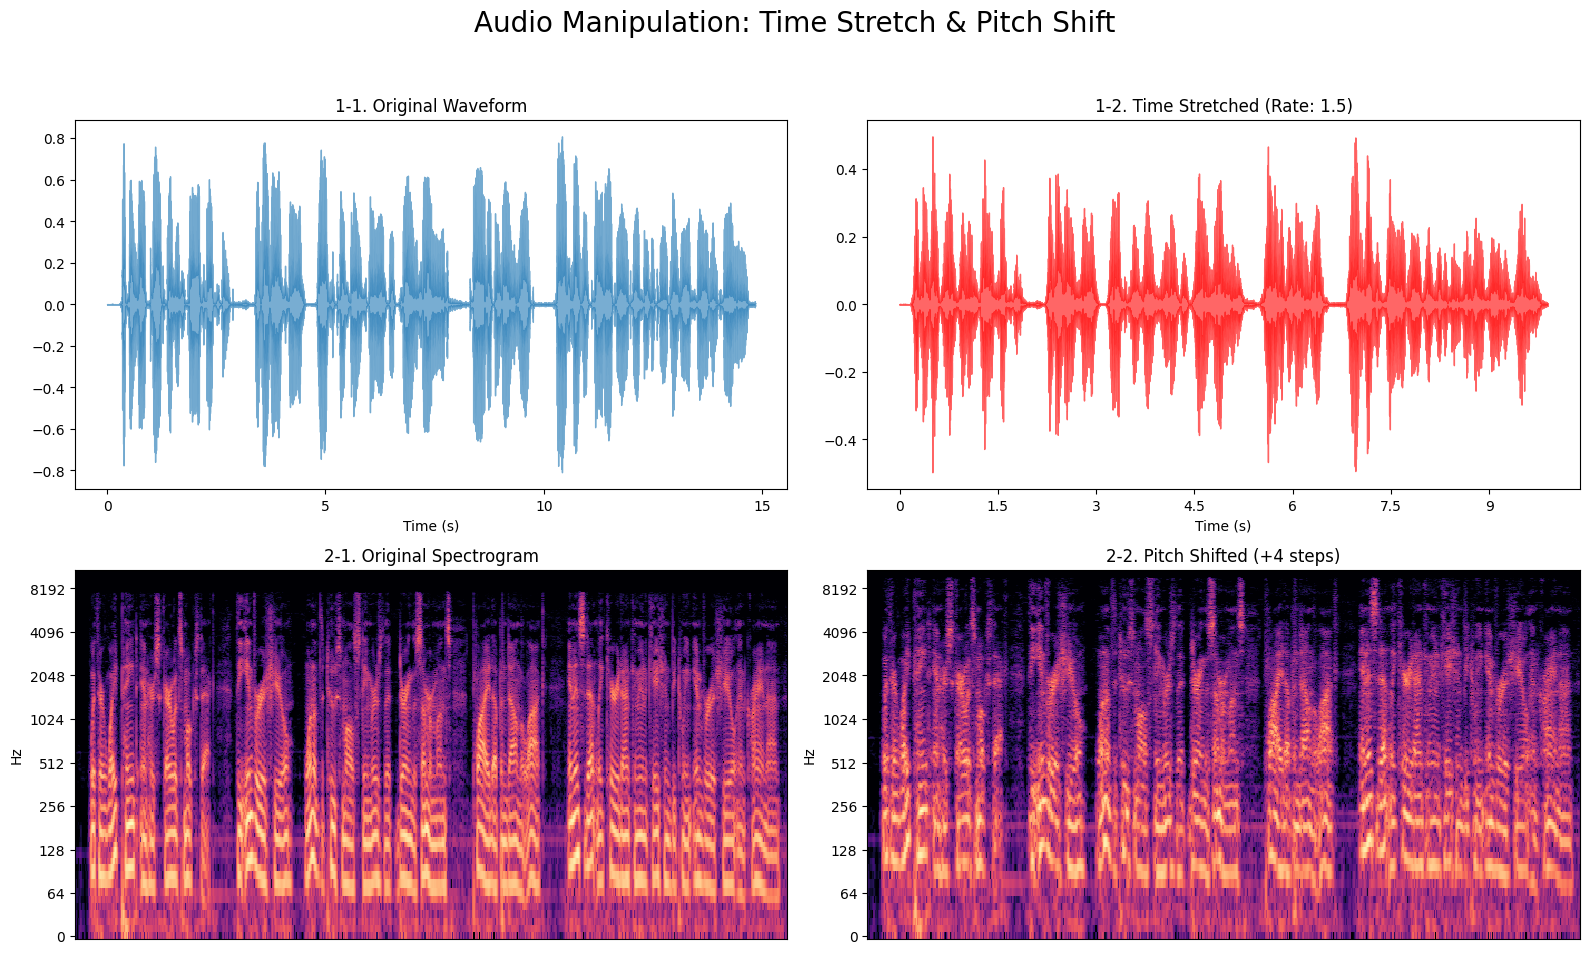

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

# 1. 데이터 로드
# 사람의 음성 데이터 사용
filename = librosa.ex('libri1')
y, sr = librosa.load(filename)

# 2. Time Stretching (시간 늘리기/줄이기)
# 재생 속도를 1.5배 빠르게 변경 (음정은 유지됨)
rate = 1.5
y_fast = librosa.effects.time_stretch(y, rate=rate)

# 3. Pitch Shifting (음정 바꾸기)
# 음정을 4 Semitones(반음) 올림 (속도는 유지됨)
n_steps = 4
y_high = librosa.effects.pitch_shift(y, sr=sr, n_steps=n_steps)

# 결과 정보 출력
print(f"Original Length: {len(y)/sr:.2f} s")
print(f"Stretched Length: {len(y_fast)/sr:.2f} s (Speed x{rate})")

# 4. 결과 시각화
plt.figure(figsize=(16, 10))
plt.suptitle('Audio Manipulation: Time Stretch & Pitch Shift', fontsize=20)

# [Row 1] Waveform 비교 (시간 변화 확인)
plt.subplot(2, 2, 1)
librosa.display.waveshow(y, sr=sr, alpha=0.6)
plt.title('1-1. Original Waveform')
plt.xlabel('Time (s)')

plt.subplot(2, 2, 2)
librosa.display.waveshow(y_fast, sr=sr, color='r', alpha=0.6)
plt.title(f'1-2. Time Stretched (Rate: {rate})')
plt.xlabel('Time (s)')

# [Row 2] Spectrogram 비교 (주파수 변화 확인)
# 원본 스펙트로그램
plt.subplot(2, 2, 3)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr)
plt.title('2-1. Original Spectrogram')

# 피치 시프트 스펙트로그램 (전체적으로 위로 이동함)
plt.subplot(2, 2, 4)
D_high = librosa.amplitude_to_db(np.abs(librosa.stft(y_high)), ref=np.max)
librosa.display.specshow(D_high, y_axis='log', sr=sr)
plt.title(f'2-2. Pitch Shifted (+{n_steps} steps)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()